In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as sp
import random
import numpy as np
import os

In [671]:
image = cv2.circle(np.zeros(256 * 256).reshape(256, 256), center=(255, 255), radius=10, color=1, thickness=-1)
image = cv2.circle(image, center=(100, 100), radius=10, color=1, thickness=-1)
image = cv2.circle(image, center=(150, 150), radius=5, color=1, thickness=-1)
image = sp.gaussian_filter(image, 2)

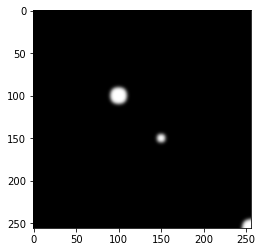

In [672]:
plt.imshow(image, cmap='gray')

In [609]:
def create_image(img, img_size=256):
    nb_circles = random.randint(0, 5)

    for i in range(nb_circles):
        while True:
            cl_radius = random.randint(10, 20)
            x, y = random.randint(0, img_size), random.randint(0, img_size)
            
            circle = cv2.circle(np.zeros(256 * 256).reshape(256, 256), center=(x, y), radius=cl_radius, color=1, thickness=-1)
            if np.logical_and(img, circle).sum() > 10:
                continue
                
            img = (img + circle).clip(0, 1)
            
            break
            
    return img

def _random_distribution(percentage, size, space=[1]):
    nb_total = size[0] * size[1]
    nb_el = int(nb_total * percentage / 3000) // len(space)
    arr = np.zeros(nb_total)
    for i in range(len(space)):
        start_index = i * nb_el
        arr[start_index:start_index + nb_el] = space[i]

    np.random.shuffle(arr)
    return arr.reshape(size)

def white_noise(img, percentage):
    rand = _random_distribution(random.randint(0, percentage), size=img.shape)
    rand = np.argwhere(rand == 1)
    
    for x, y in rand:
        cl_radius = random.randint(2, 3)            
        img = cv2.circle(img, center=(x, y), radius=cl_radius, color=1, thickness=-1)

    return img

In [590]:
def create_image(img, img_size=28):
    nb_squares = random.randint(0, 5)
    
    for i in range(nb_squares):
        while True:
            sq_size = random.randint(2, 5)
            x, y = random.randint(0, img_size - sq_size), random.randint(0, img_size - sq_size)
            if img[x:x + sq_size, y:y + sq_size].sum() != 0:
                continue
            
            img[x:x + sq_size, y:y + sq_size] = 1
            break
            
    return img

def _random_distribution(percentage, size, space=[1]):
    nb_total = size[0] * size[1]
    nb_el = int(nb_total * percentage / 100) // len(space)
    arr = np.zeros(nb_total)
    for i in range(len(space)):
        start_index = i * nb_el
        arr[start_index:start_index + nb_el] = space[i]

    np.random.shuffle(arr)
    return arr.reshape(size)

def white_noise(img, percentage):
    rand = _random_distribution(random.randint(0, percentage), size=img.shape)
    return np.ma.masked_array(img, rand.reshape(img.shape)).filled(1)

In [708]:
%%time

DATASET_SIZE = 10000
x = np.zeros(256 * 256 * DATASET_SIZE).reshape(DATASET_SIZE, 1, 256, 256)
y = np.zeros(256 * 256 * DATASET_SIZE).reshape(DATASET_SIZE, 1, 256, 256)

def create_dataset(x_, y_, idx):
    x_[idx, 0] = create_image(x_[idx, 0])
    y_[idx, 0] = white_noise(y_[idx, 0], 15)
    
    y_[idx, 0] = sp.gaussian_filter(y_[idx, 0], 1)
    x_[idx, 0] = sp.gaussian_filter(x_[idx, 0], 2)
    
    y_[idx, 0] = y_[idx, 0] * (1 - x_[idx, 0])
    x_[idx, 0] = (x_[idx, 0] + y_[idx, 0]).clip(0, 1)

for i in range(DATASET_SIZE):
    if i % 1000 == 0:
        print(i)
    create_dataset(x, y, i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
CPU times: user 12min 55s, sys: 59.6 s, total: 13min 54s
Wall time: 13min 56s


In [1]:
plt.subplot(1, 2, 1)
plt.imshow(x[1, 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(y[1, 0], cmap='gray')
plt.show()

print(x[2, 0].min(), x[2, 0].max())

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


NameError: name 'plt' is not defined

In [7]:
os.listdir("../gwtoh")

['t10k-images.npy', 't10k-labels.npy', 'train-images.npy', 'train-labels.npy']

In [722]:
#train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
#train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)
#t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)
#t10k-labels-idx1-ubyte.gz:

np.save('train-images.npy', x[:10000])
np.save('train-labels.npy', y[:10000])
np.save('t10k-images.npy', x[10000:11000])
np.save('t10k-labels.npy', y[10000:11000])

In [21]:
dset = np.load('../biwtoh/train-images.npy')
dlab = np.load('../biwtoh/train-labels.npy')

In [24]:
dset.shape, dlab.shape

((60000, 1, 28, 28), (60000, 1, 28, 28))

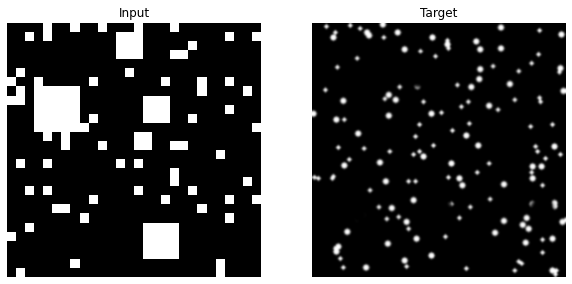

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dset[3, 0], cmap='gray')
plt.axis('off')
plt.title('Input')
plt.subplot(1, 2, 2)
plt.imshow(dlab[3, 0], cmap='gray')
plt.title('Target')
plt.axis('off')
plt.show()

In [51]:
def draw_disk(radius, shape=None, dtype="float32"):
    from skimage import morphology

    res = morphology.disk(radius).astype(dtype)
    if shape is not None:
        return center_in(res, shape)
    return res


def draw_diamond(radius, shape=None, dtype="float32"):
    from skimage import morphology

    res = morphology.diamond(radius).astype(dtype)
    if shape is not None:
        return center_in(res, shape)
    return res


def center_in(arr, shape, dtype="float32"):
    res = np.zeros(shape=shape, dtype=dtype)
    pad_before = (shape[0] - arr.shape[0]) // 2, (shape[1] - arr.shape[1]) // 2
    pad_after = shape[0] - pad_before[0], shape[1] - pad_before[1]
    res[pad_before[0] : pad_after[0], pad_before[1] : pad_after[1]] = arr
    return res


def shape_aa(original, target_shape):
    from skimage import transform

    return transform.resize(
        original, target_shape, preserve_range=True, anti_aliasing=True
    )


def draw_disk_aa(radius, shape=None, dtype="float32"):
    from skimage import transform

    dim = radius * 2 + 1
    res = draw_disk(dim, dtype=dtype)
    res = shape_aa(res, (dim, dim))

    if shape is not None:
        return center_in(res, shape)
    return res


def draw_diamond_aa(radius, shape=None, dtype="float32"):
    dim = radius * 2 + 1
    res = draw_diamond(dim, dtype=dtype)
    res = shape_aa(res, (dim, dim))

    if shape is not None:
        return center_in(res, shape, dtype=dtype)
    return res


def draw_cross(size, shape=None, dtype="float32"):
    res = np.zeros((size, size), dtype=dtype)
    res[size // 2, :] = 1.0
    res[:, size // 2] = 1.0
    if shape is not None:
        return center_in(res, shape, dtype=dtype)
    return res


def draw_x(size, shape=None, dtype="float32"):
    x, y = np.mgrid[0:size, 0:size]
    res = np.zeros((size, size), dtype=dtype)
    res[x == y] = 1.0
    if shape is not None:
        return center_in(res, shape, dtype=dtype)
    return res

def draw_complex(shape=None, dtype="float32"):
    return draw_disk_aa(3, shape, dtype=dtype) \
           - draw_diamond_aa(2, shape, dtype=dtype)

def draw_bsquare(size, shape=None, dtype="float32"):
    res = np.ones((size, size), dtype=dtype)
    if shape is not None:
        return center_in(res, shape, dtype=dtype)
    return res

def draw_bdiamond(size, shape=None, dtype="float32"):
    l = np.arange(0, size * 2 + 1)
    x, y = np.meshgrid(l, l)
    res = np.array(np.abs(x - size) + np.abs(y - size) <= size, dtype=dtype)
    if shape is not None:
        return center_in(res, shape, dtype=dtype)
    return res

def draw_siadiag(size, shape=None, dtype="float32"):
    diag = np.diag([1] * size)
    diag[3, 4:5] = 1
    diag[1:3, 4] = 1
    diag[1, 3] = 1
    diag[0, 0] = 0

    return diag

def draw_iadiag(size, shape=None, dtype="float32"):
    diag = np.diag([1] * size)
    diag[3, 4:5] = 1
    diag[1:3, 4] = 1
    diag[1, 3] = 1
    diag[0, 0] = 0
    diag[6, 6] = 0

    return diag

def draw_adiag(size, shape=None, dtype="float32"):
    diag = np.diag([1] * size)
    diag[3, 4:5] = 1
    diag[1:3, 4] = 1
    diag[1, 3] = 1

    return diag

In [52]:
STRUCTURING_ELEMENTS = {
    "disk2": lambda filter_shape, dtype: draw_disk(2, filter_shape, dtype=dtype),
    "diskaa1": lambda filter_shape, dtype: draw_disk_aa(1, filter_shape, dtype=dtype),
    "diskaa2": lambda filter_shape, dtype: draw_disk_aa(2, filter_shape, dtype=dtype),
    "diskaa3": lambda filter_shape, dtype: draw_disk_aa(3, filter_shape, dtype=dtype),
    "diamondaa3": lambda filter_shape, dtype: draw_diamond_aa(
        3, filter_shape, dtype=dtype
    ),
    "complex": lambda filter_shape, dtype: draw_complex(filter_shape, dtype=dtype),
    "cross3": lambda filter_shape, dtype: draw_cross(3, filter_shape, dtype=dtype),
    "cross5": lambda filter_shape, dtype: draw_cross(5, filter_shape, dtype=dtype),
    "cross7": lambda filter_shape, dtype: draw_cross(7, filter_shape, dtype=dtype),
    "x3": lambda filter_shape, dtype: draw_x(3, filter_shape, dtype=dtype),
    "x5": lambda filter_shape, dtype: draw_x(5, filter_shape, dtype=dtype),
    "rand": lambda filter_shape, dtype: rng.normal(
        size=filter_shape, loc=1.5, scale=0.05
    ).astype(dtype),
    "bcomplex": lambda filter_shape, dtype: np.where(draw_complex(filter_shape,
            dtype=dtype) < 0.5, 0, 1),
    "bsquare": lambda filter_shape, dtype: draw_bsquare(3, filter_shape, dtype=dtype),
    "bdiamond": lambda filter_shape, dtype: draw_bdiamond(3, filter_shape, dtype=dtype),
    "doubledisk9_2": lambda filter_shape, dtype: (draw_disk_aa(4, (9, 9)) - draw_disk_aa(3, (9, 9)) > 0.5) + draw_diamond(2, (9, 9)),
    "doubledisk9_1": lambda filter_shape, dtype: (draw_disk_aa(4, (9, 9)) - draw_disk_aa(3, (9, 9)) > 0.5) + draw_diamond(1, (9, 9)),
    "doubledisk7_0": lambda filter_shape, dtype: (draw_disk_aa(3, (7, 7)) - draw_disk_aa(2, (7, 7)) > 0.5),
    "doubledisk7_1": lambda filter_shape, dtype: (draw_disk_aa(3, (7, 7)) - draw_disk_aa(2, (7, 7)) > 0.5) + draw_disk(0, (7, 7)),
    "diag": lambda filter_shape, dtype: np.diag([1] * filter_shape[0]),
    "adiag": lambda filter_shape, dtype: draw_adiag(7, filter_shape, dtype=dtype),
    "iadiag": lambda filter_shape, dtype: draw_iadiag(7, filter_shape, dtype=dtype),
    "siadiag": lambda filter_shape, dtype: draw_siadiag(7, filter_shape, dtype=dtype)
}

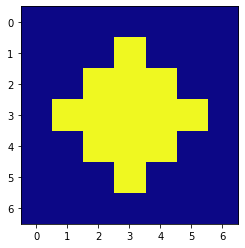

In [104]:
plt.imshow(STRUCTURING_ELEMENTS["disk2"]((7, 7), dtype='float32'), cmap='plasma')

In [718]:
lena = cv2.imread('leba.jpg')
lena.shape

(512, 512, 3)

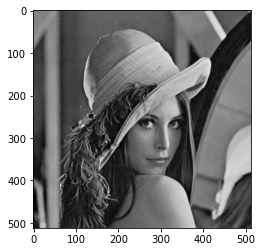

In [716]:
plt.imshow(lena)

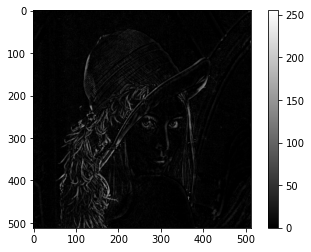

In [720]:
plt.imshow(sp.white_tophat(lena[:, :, 0], structure=STRUCTURING_ELEMENTS["bsquare"]((7, 7), dtype='float32')), cmap='gray')
plt.colorbar()

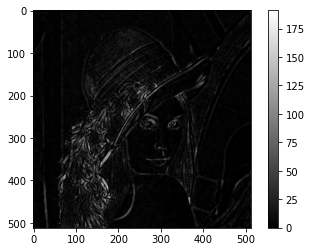

In [721]:
plt.imshow(sp.black_tophat(lena[:, :, 0], structure=STRUCTURING_ELEMENTS["bsquare"]((7, 7), dtype='float32')), cmap='gray')
plt.colorbar()